In [25]:
%matplotlib inline
# first we ingest the data from the source on the web
# this contains a reduced version of the data set from Lending Club
import pandas as pd
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')
df = loansData
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio'].apply(lambda x: x[:-1]).astype('float64')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df.State = le.fit_transform(df.State).astype('float64')
df['Home.Ownership'] = le.fit_transform(df['Home.Ownership']).astype('float64')

df['Interest.Rate'] = df['Interest.Rate'].apply(lambda x: x[:-1]).astype('float64')

del df['Loan.Purpose']
df = df.dropna()

def numonly(string):
    res = ''
    for x in string:
        if x.isdigit():
            res = res+x
    return int(res)
   
df['Loan.Length'] = df['Loan.Length'].apply(numonly)

def noline(string):
    x = string.split('-')
    c = 0
    for y in x:
        y=int(y)
        c+=y
    return c/2

df['FICO.Range'] = df['FICO.Range'].apply(noline)

df['Amount.Requested'] = df['Amount.Requested'].astype('float64')
df['Loan.Length'] = df['Loan.Length'].astype('float64')
del df['Employment.Length']

from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.shape

C:\Users\Harrison\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harrison\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harrison\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [28]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
81174,20000.0,20000.0,8.90,36.0,14.90,36.0,0.0,6541.67,737.0,14.0,14272.0,2.0
99592,19200.0,19200.0,12.12,36.0,28.36,38.0,0.0,4583.33,717.0,12.0,11140.0,1.0
80059,35000.0,35000.0,21.98,60.0,23.81,4.0,0.0,11500.00,692.0,14.0,21977.0,1.0
15825,10000.0,9975.0,9.99,36.0,14.30,15.0,0.0,3833.33,697.0,10.0,9346.0,0.0
33182,12000.0,12000.0,11.71,36.0,18.78,27.0,4.0,3195.00,697.0,11.0,14469.0,0.0


## Visual Exploration

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histograms

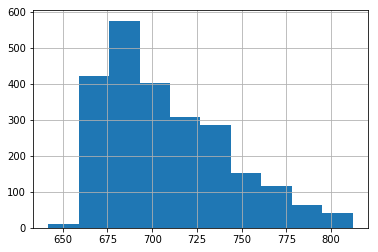

In [30]:
df['FICO.Range'].hist()

### Box Plot

C:\Users\Harrison\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'                          ')

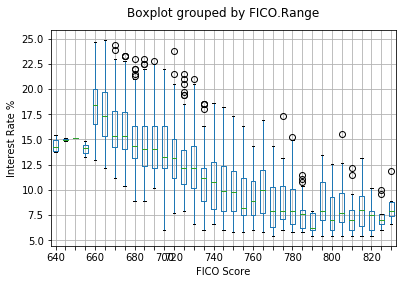

In [39]:
fig = plt.figure()
x = df.boxplot('Interest.Rate',  'FICO.Range')
x.set_xticklabels(['640','','','','660','','','','680','','','700',
  '720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])
x.set_xlabel('FICO Score')
x.set_ylabel('Interest Rate %')
x.set_title('                          ')

From here we need to make a pairplot of all of the interesting variables that might effect interest rate. consider 

amount requested

FICO Score

Monthly Income

Loan Length

Interest Rate


from here you should see a relation to FICO Score and Loan Amount